In [1]:
!pip install --upgrade pandas-datareader

     |████████████████████████████████| 107 kB 2.2 MB/s eta 0:00:01


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests

In [4]:
s = pd.Series(np.random.randn(4), name='daily returns')
s 

0    0.829567
1    0.468262
2    0.288803
3    2.306498
Name: daily returns, dtype: float64

In [5]:
s * 100

0     82.956662
1     46.826223
2     28.880265
3    230.649844
Name: daily returns, dtype: float64

In [6]:
np.abs(s)

0    0.829567
1    0.468262
2    0.288803
3    2.306498
Name: daily returns, dtype: float64

In [7]:
s.describe()

count    4.000000
mean     0.973282
std      0.916820
min      0.288803
25%      0.423397
50%      0.648914
75%      1.198800
max      2.306498
Name: daily returns, dtype: float64

In [8]:
s.index = ['AMZN', 'AAPL', 'MSFT', 'GOOG']
s

AMZN    0.829567
AAPL    0.468262
MSFT    0.288803
GOOG    2.306498
Name: daily returns, dtype: float64

In [10]:
s['AMZN']

0.8295666183774502

In [11]:
s['AMZN'] = 0
s 


AMZN    0.000000
AAPL    0.468262
MSFT    0.288803
GOOG    2.306498
Name: daily returns, dtype: float64

In [12]:
'AAPL' in s

True

In [13]:
df = pd.read_csv('https://raw.githubusercontent.com/QuantEcon/lecture-python-programming/master/source/_static/lecture_specific/pandas/data/test_pwt.csv')
type(df)

pandas.core.frame.DataFrame

In [14]:
df

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000,37335.653,0.999500,2.950722e+05,75.716805,5.578804
1,Australia,AUS,2000,19053.186,1.724830,5.418047e+05,67.759026,6.720098
2,India,IND,2000,1006300.297,44.941600,1.728144e+06,64.575551,14.072206
3,Israel,ISR,2000,6114.570,4.077330,1.292539e+05,64.436451,10.266688
4,Malawi,MWI,2000,11801.505,59.543808,5.026222e+03,74.707624,11.658954
5,South Africa,ZAF,2000,45064.098,6.939830,2.272424e+05,72.718710,5.726546
6,United States,USA,2000,282171.957,1.000000,9.898700e+06,72.347054,6.032454
7,Uruguay,URY,2000,3219.793,12.099592,2.525596e+04,78.978740,5.108068


In [15]:
df[2:5]

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
2,India,IND,2000,1006300.297,44.941600,1.728144e+06,64.575551,14.072206
3,Israel,ISR,2000,6114.570,4.077330,1.292539e+05,64.436451,10.266688
4,Malawi,MWI,2000,11801.505,59.543808,5.026222e+03,74.707624,11.658954


In [17]:
df[['country', 'tcgdp']]


,country,tcgdp
0,Argentina,2.950722e+05
1,Australia,5.418047e+05
2,India,1.728144e+06
3,Israel,1.292539e+05
4,Malawi,5.026222e+03
5,South Africa,2.272424e+05
6,United States,9.898700e+06
7,Uruguay,2.525596e+04


In [18]:
df.iloc[2:5, 0:4]

,country,country isocode,year,POP
2,India,IND,2000,1006300.297
3,Israel,ISR,2000,6114.570
4,Malawi,MWI,2000,11801.505


In [19]:
df.loc[df.index[2:5], ['country', 'tcgdp']]

,country,tcgdp
2,India,1.728144e+06
3,Israel,1.292539e+05
4,Malawi,5.026222e+03


In [21]:
df = df[['country', 'POP', 'tcgdp']]
df


,country,POP,tcgdp
0,Argentina,37335.653,2.950722e+05
1,Australia,19053.186,5.418047e+05
2,India,1006300.297,1.728144e+06
3,Israel,6114.570,1.292539e+05
4,Malawi,11801.505,5.026222e+03
5,South Africa,45064.098,2.272424e+05
6,United States,282171.957,9.898700e+06
7,Uruguay,3219.793,2.525596e+04


In [22]:
df = df.set_index('country')
df

,POP,tcgdp
country,,
Argentina,37335.653,2.950722e+05
Australia,19053.186,5.418047e+05
India,1006300.297,1.728144e+06
Israel,6114.570,1.292539e+05
Malawi,11801.505,5.026222e+03
South Africa,45064.098,2.272424e+05
United States,282171.957,9.898700e+06
Uruguay,3219.793,2.525596e+04


In [24]:
df.columns = 'population', 'total GDP'
df

,population,total GDP
country,,
Argentina,37335.653,2.950722e+05
Australia,19053.186,5.418047e+05
India,1006300.297,1.728144e+06
Israel,6114.570,1.292539e+05
Malawi,11801.505,5.026222e+03
South Africa,45064.098,2.272424e+05
United States,282171.957,9.898700e+06
Uruguay,3219.793,2.525596e+04


In [25]:
df['population'] = df['population'] * 1e3
df

,population,total GDP
country,,
Argentina,3.733565e+07,2.950722e+05
Australia,1.905319e+07,5.418047e+05
India,1.006300e+09,1.728144e+06
Israel,6.114570e+06,1.292539e+05
Malawi,1.180150e+07,5.026222e+03
South Africa,4.506410e+07,2.272424e+05
United States,2.821720e+08,9.898700e+06
Uruguay,3.219793e+06,2.525596e+04


In [26]:
df['GDP percap'] = df['total GDP'] * 1e6 / df['population']
df

,population,total GDP,GDP percap
country,,,
Argentina,3.733565e+07,2.950722e+05,7903.229085
Australia,1.905319e+07,5.418047e+05,28436.433261
India,1.006300e+09,1.728144e+06,1717.324719
Israel,6.114570e+06,1.292539e+05,21138.672749
Malawi,1.180150e+07,5.026222e+03,425.896679
South Africa,4.506410e+07,2.272424e+05,5042.647686
United States,2.821720e+08,9.898700e+06,35080.381854
Uruguay,3.219793e+06,2.525596e+04,7843.970620


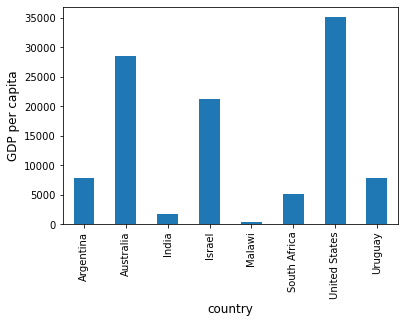

In [27]:
ax = df['GDP percap'].plot(kind='bar')
ax.set_xlabel('country', fontsize=12)
ax.set_ylabel('GDP per capita', fontsize=12)
plt.show()

In [28]:
df = df.sort_values(by='GDP percap', ascending=False)
df

,population,total GDP,GDP percap
country,,,
United States,2.821720e+08,9.898700e+06,35080.381854
Australia,1.905319e+07,5.418047e+05,28436.433261
Israel,6.114570e+06,1.292539e+05,21138.672749
Argentina,3.733565e+07,2.950722e+05,7903.229085
Uruguay,3.219793e+06,2.525596e+04,7843.970620
South Africa,4.506410e+07,2.272424e+05,5042.647686
India,1.006300e+09,1.728144e+06,1717.324719
Malawi,1.180150e+07,5.026222e+03,425.896679


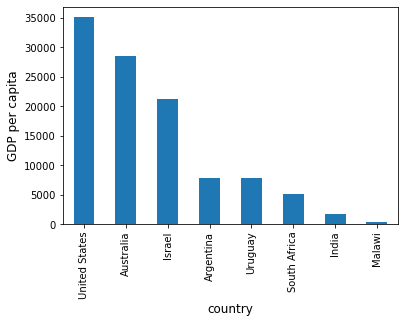

In [29]:
ax = df['GDP percap'].plot(kind='bar')
ax.set_xlabel('country', fontsize=12)
ax.set_ylabel('GDP per capita', fontsize=12)
plt.show()

In [31]:
r = requests.get('http://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.csv')

In [32]:
url = 'http://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.csv'

In [33]:
source = requests.get(url).content.decode().split("\n")
source[0]

'DATE,VALUE\r'

In [34]:
source[1]

'1948-01-01,3.4\r'

In [35]:
source[2]

'1948-02-01,3.8\r'

In [36]:
data = pd.read_csv(url, index_col=0, parse_dates=True)

In [37]:
type(data)

pandas.core.frame.DataFrame

In [38]:
data.head()  # A useful method to get a quick look at a data frame

,VALUE
DATE,
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5


In [39]:
pd.set_option('precision', 1)        #To one decimal
data.describe()  # Your output might differ slightly

,VALUE
count,872.0
mean,5.8
std,1.7
min,2.5
25%,4.5
50%,5.6
75%,6.8
max,14.7


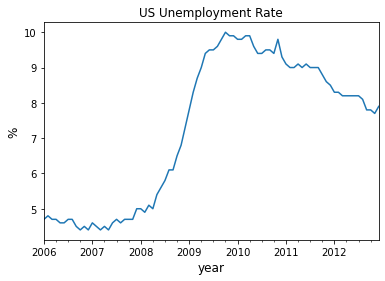

In [40]:
ax = data['2006':'2012'].plot(title='US Unemployment Rate', legend=False)
ax.set_xlabel('year', fontsize=12)
ax.set_ylabel('%', fontsize=12)
plt.show()

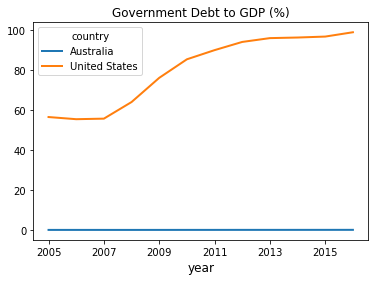

In [41]:
from pandas_datareader import wb

govt_debt = wb.download(indicator='GC.DOD.TOTL.GD.ZS', country=['US', 'AU'], start=2005, end=2016).stack().unstack(0)
ind = govt_debt.index.droplevel(-1)
govt_debt.index = ind
ax = govt_debt.plot(lw=2)
ax.set_xlabel('year', fontsize=12)
plt.title("Government Debt to GDP (%)")
plt.show()

In [42]:
import datetime as dt
from pandas_datareader import data

In [43]:
ticker_list = {'INTC': 'Intel',
               'MSFT': 'Microsoft',
               'IBM': 'IBM',
               'BHP': 'BHP',
               'TM': 'Toyota',
               'AAPL': 'Apple',
               'AMZN': 'Amazon',
               'BA': 'Boeing',
               'QCOM': 'Qualcomm',
               'KO': 'Coca-Cola',
               'GOOG': 'Google',
               'SNE': 'Sony',
               'PTR': 'PetroChina'}

In [44]:
def read_data(ticker_list,
          start=dt.datetime(2019, 1, 2),
          end=dt.datetime(2019, 12, 31)):
    """
    This function reads in closing price data from Yahoo
    for each tick in the ticker_list.
    """
    ticker = pd.DataFrame()

    for tick in ticker_list:
        prices = data.DataReader(tick, 'yahoo', start, end)
        closing_prices = prices['Close']
        ticker[tick] = closing_prices

    return ticker

In [45]:
ticker = read_data(ticker_list)

In [46]:
ticker.head()

,INTC,MSFT,IBM,BHP,TM,AAPL,AMZN,BA,QCOM,KO,GOOG,SNE,PTR
Date,,,,,,,,,,,,,
2019-01-02,47.1,101.1,115.2,47.9,116.3,39.5,1539.1,323.8,57.4,46.9,1045.8,48.7,60.9
2019-01-03,44.5,97.4,112.9,46.4,114.7,35.5,1500.3,310.9,55.7,46.6,1016.1,47.0,61.2
2019-01-04,47.2,101.9,117.3,49.2,119.7,37.1,1575.4,327.1,56.6,47.6,1070.7,49.2,62.8
2019-01-07,47.4,102.1,118.2,49.5,121.3,37.0,1629.5,328.1,56.4,47.0,1068.4,49.7,62.5
2019-01-08,47.7,102.8,119.8,49.3,122.3,37.7,1656.6,340.5,56.0,47.5,1076.3,49.9,63.9


In [47]:
p1=ticker.iloc[0]

In [48]:
p1

INTC      47.1
MSFT     101.1
IBM      115.2
BHP       47.9
TM       116.3
AAPL      39.5
AMZN    1539.1
BA       323.8
QCOM      57.4
KO        46.9
GOOG    1045.8
SNE       48.7
PTR       60.9
Name: 2019-01-02 00:00:00, dtype: float64

In [49]:
p2=ticker.iloc[-1]

In [50]:
price_change=(p2-p1)/p1*100
price_change

INTC    27.1
MSFT    56.0
IBM     16.3
BHP     14.3
TM      20.9
AAPL    85.9
AMZN    20.1
BA       0.6
QCOM    53.7
KO      17.9
GOOG    27.8
SNE     39.6
PTR    -17.4
dtype: float64

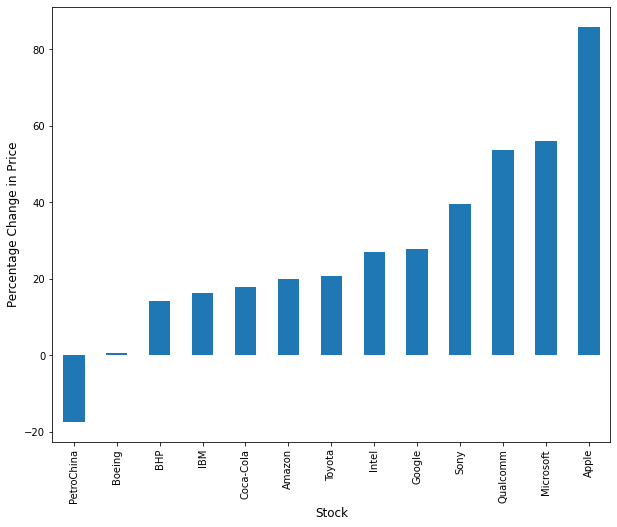

In [51]:
price_change.sort_values(inplace=True)
price_change=price_change.rename(index=ticker_list)
fig, ax=plt.subplots(figsize=(10,8))
ax.set_xlabel('Stock',fontsize=12)
ax.set_ylabel('Percentage Change in Price', fontsize=12)
price_change.plot(kind='bar',ax=ax)
plt.show()

In [52]:
indices_list = {'^GSPC': 'S&P 500',
               '^IXIC': 'NASDAQ',
               '^DJI': 'Dow Jones',
               '^N225': 'Nikkei'}

In [53]:
indices_data=read_data(indices_list,start=dt.datetime(1928,1,2),end=dt.datetime(2020,12,31))

In [54]:
indices_data

,^GSPC,^IXIC,^DJI,^N225
Date,,,,
1928-01-03,17.8,NaN,NaN,NaN
1928-01-04,17.7,NaN,NaN,NaN
1928-01-05,17.5,NaN,NaN,NaN
1928-01-06,17.7,NaN,NaN,NaN
1928-01-09,17.5,NaN,NaN,NaN
...,...,...,...,...
2020-09-11,3341.0,10853.5,27665.6,23406.5
2020-09-14,3383.5,11056.7,27993.3,23559.3
2020-09-15,3401.2,11190.3,27995.6,23454.9


In [55]:
yearly_returns=pd.DataFrame()
for index,name in indices_list.items():
    p1=indices_data.groupby(indices_data.index.year)[index].first()
    p2=indices_data.groupby(indices_data.index.year)[index].last()
    returns=(p2-p1)/p1
    yearly_returns[name]=returns
    

In [56]:
yearly_returns

,S&P 500,NASDAQ,Dow Jones,Nikkei
Date,,,,
1928,3.7e-01,NaN,NaN,NaN
1929,-1.4e-01,NaN,NaN,NaN
1930,-2.8e-01,NaN,NaN,NaN
1931,-4.9e-01,NaN,NaN,NaN
1932,-8.5e-02,NaN,NaN,NaN
...,...,...,...,...
2016,1.1e-01,9.8e-02,1.5e-01,3.6e-02
2017,1.8e-01,2.7e-01,2.4e-01,1.6e-01
2018,-7.0e-02,-5.3e-02,-6.0e-02,-1.5e-01


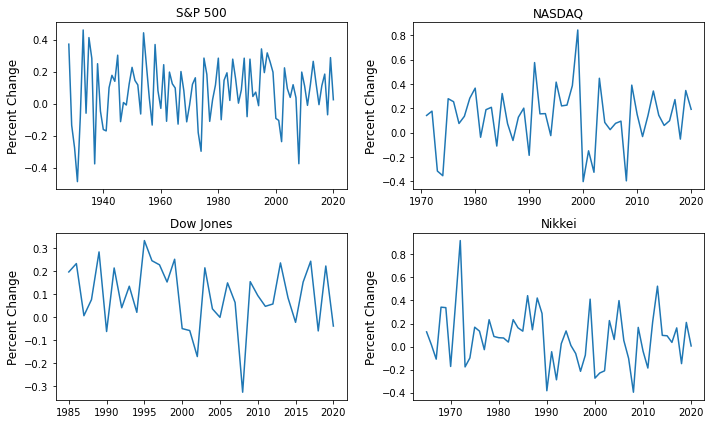

In [57]:
fig,axes=plt.subplots(2,2,figsize=(10,6))
for iter__,ax in enumerate(axes.flatten()):
    index_name=yearly_returns.columns[iter__]
    ax.plot(yearly_returns[index_name])
    ax.set_ylabel("Percent Change", fontsize=12)
    ax.set_title(index_name)
plt.tight_layout()